**Introduction**  

The main objective of this report is to analyze and identify customer monthly transaction patterns and get business insights from it. Linear regression, a popular machine learning model is discussed to predict future monthly transactional amount which can assist business executive for better decision-making. The popular CRISP-DM framework is used to breakdown the process.  
The Cross Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. Repetition is a critical component of CRISP-DM. It’s important to bear in mind that a pass through the process without a solution generally isn’t a failure. With every pass through the process, the data science team learns more about the data and overarching project. This report has been prepared using the CRISP-DM format and is broken 
Into following sections.  
1.	Business understanding  
2.	Data understanding  
3.	Data preparation  
4.	Modeling  
5.	Evaluation  
6.	Deployment  

![crisp](crisp.png)


**1. Business Understanding**  
Business understanding is the most important step in CRISP-DM framework as one needs to understand what the domain is and why it is being done along with how it will benefit the company considering the problem statement. It can be divided into two objectives.  
**1.1 Business Objectives:** The company has financial transactional data over certain monthly period impacted by location and industries. We want to know the different insight like seasonal trend, extract the customer transactions pattern and driving factors of the trends. The goal is to predict monthly amount based on past data.  
**1.2 Data Mining Objectives:** It focuses on applying different data analysis and visualization techniques to identify patterns.  


**Importing the required R libraries with their description**

In [1]:
try(library(tidyverse), silent=TRUE) # data wrangling
try(library(dplyr), silent=TRUE)  # data processing
try(library(ggplot2), silent=TRUE) # data visualization
try(library(caret), silent=TRUE) # streamline the model training process
try(library(Rcpp), silent=TRUE) #Rcpp provides a clean, approachable API that lets you write high-performance code
library(Amelia)   # for Missing Data
library(sqldf)    # using SQL
library(ggpubr)   # combine plots into single page
library(reshape2) # transpose table
library(fmsb)     # create radar chart
library(ggthemes) # Load ggthemes package

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.5 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


Registered S3 methods overwritten by 'fmsb':
  method   

**2. Data Understanding**  
Following that, the Data Understanding phase is where we focus on understanding the data collected to support the Business Understanding and resolve the business challenge. Data preprocessing and data visualization techniques play an essential role in this.  

**2.1 Basic Exploratory Data Analysis (EDA) and Insights**

In [2]:
dataset = read.csv("dataset/transactions.csv")
head(dataset)

,date,customer_id,industry,location,monthly_amount
,<chr>,<chr>,<int>,<int>,<dbl>
1,1/01/2013,70efdf2ec9b086079795c442636b55fb,8,9,753851.5
2,1/02/2013,70efdf2ec9b086079795c442636b55fb,8,9,651548.4
3,1/03/2013,70efdf2ec9b086079795c442636b55fb,8,9,1138768.6
4,1/04/2013,70efdf2ec9b086079795c442636b55fb,8,9,659738.9
5,1/05/2013,70efdf2ec9b086079795c442636b55fb,8,9,770675.2
6,1/06/2013,70efdf2ec9b086079795c442636b55fb,8,9,592245.8


We can see that the date column is show as character so we need change it to date data type. Also, the Customer_id column is converted to string


In [3]:
dataset$date = as.Date(dataset$date, format = "%d/%m/%Y")
dataset$customer_id = as.character(dataset$customer_id, format = "")
print('=====================================================================')

print('---Inspect columns data type-----\n\n')
sapply(dataset, class) 
print('=======================================================================')

print('---view the information of dataset-----\n\n')
str(dataset)
print('=======================================================================')

print('Summary of the dataset\n\n')
summary(dataset)


[1] "====================================================================="
[1] "---Inspect columns data type-----\n\n"


date    customer_id       industry       location monthly_amount 
        "Date"    "character"      "integer"      "integer"      "numeric"

[1] "======================================================================="
[1] "---view the information of dataset-----\n\n"
'data.frame':	94248 obs. of  5 variables:
 $ date          : Date, format: "2013-01-01" "2013-02-01" ...
 $ customer_id   : chr  "70efdf2ec9b086079795c442636b55fb" "70efdf2ec9b086079795c442636b55fb" "70efdf2ec9b086079795c442636b55fb" "70efdf2ec9b086079795c442636b55fb" ...
 $ industry      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ location      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ monthly_amount: num  753851 651548 1138769 659739 770675 ...
[1] "======================================================================="
[1] "Summary of the dataset\n\n"


      date            customer_id           industry         location     
 Min.   :2013-01-01   Length:94248       Min.   : 1.000   Min.   : 1.000  
 1st Qu.:2014-05-01   Class :character   1st Qu.: 1.000   1st Qu.: 2.000  
 Median :2015-06-01   Mode  :character   Median : 2.000   Median : 4.000  
 Mean   :2015-03-26                      Mean   : 2.455   Mean   : 4.214  
 3rd Qu.:2016-03-01                      3rd Qu.: 3.000   3rd Qu.: 6.000  
 Max.   :2016-11-01                      Max.   :10.000   Max.   :10.000  
 monthly_amount     
 Min.   :        0  
 1st Qu.:    95323  
 Median :   179399  
 Mean   :   395397  
 3rd Qu.:   375439  
 Max.   :100000000  

The dataset contains 94248 transactions and 5 features (date:'Date',customer_id:character,'industry':integer,'location':integer,'monthly_amount':numeric) over the period from 2013-01-01 to 2016-11-01 across 10 industries and locations. The features contains both numerical and time-series data.
We will be using monthly_amount as our target variable which is our goal to get the predicted value for future years greater than 2016. Since the target variable is numeric we can classify our business problem as a supervised machine learning problem.


**2.1.1 Check for missing value in each column by plotting**

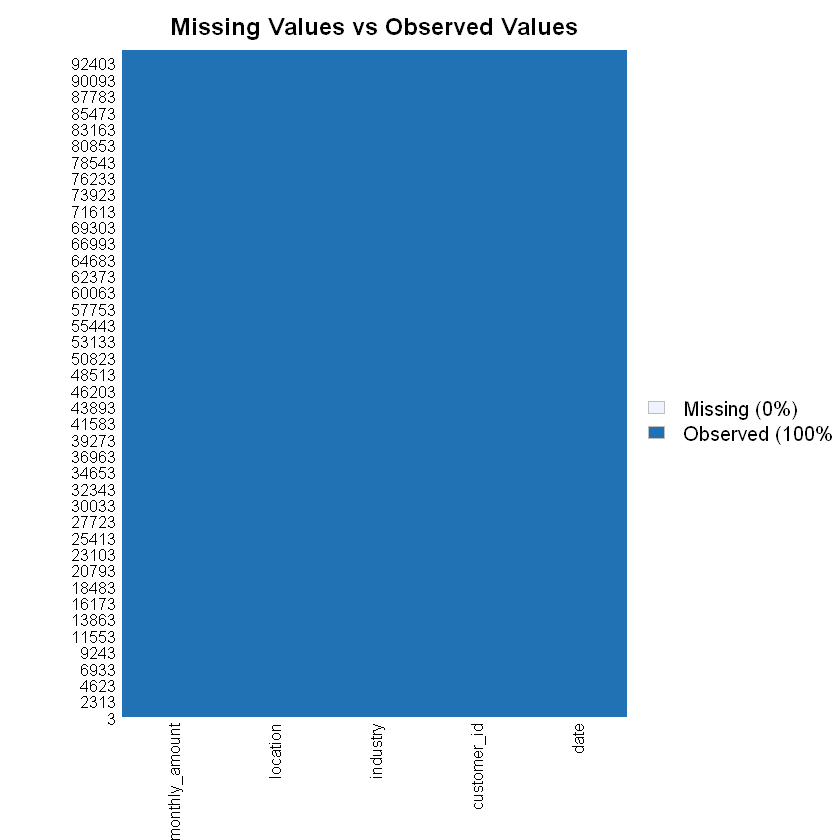

In [4]:
missmap(dataset, main = "Missing Values vs Observed Values")

From the above graph we can conclude that there are no any missing values in all 5 features.

**2.1.2 Univariate Analysis : Check the distribution of each field**

Lets check if trend of variables with each field.

A. Scatter plot of total monthly transations per industry

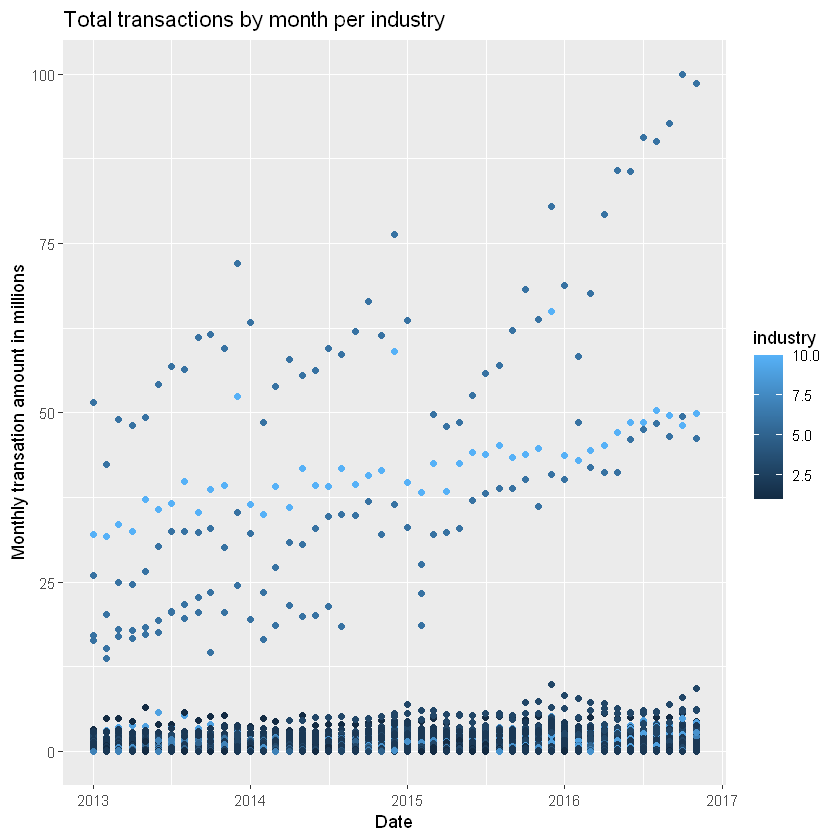

In [5]:
plot_date_vs_month = ggplot(data = dataset, aes(x = date, y = monthly_amount/1e6)) +
  geom_point(aes(colour = industry)) +
  scale_y_continuous(labels = scales::comma) +
  labs (title = "Total transactions by month per industry",
        x = "Date",
        y = "Monthly transation amount in millions")
        
plot_date_vs_month

B. Scatter plot of total transactions by month per industry

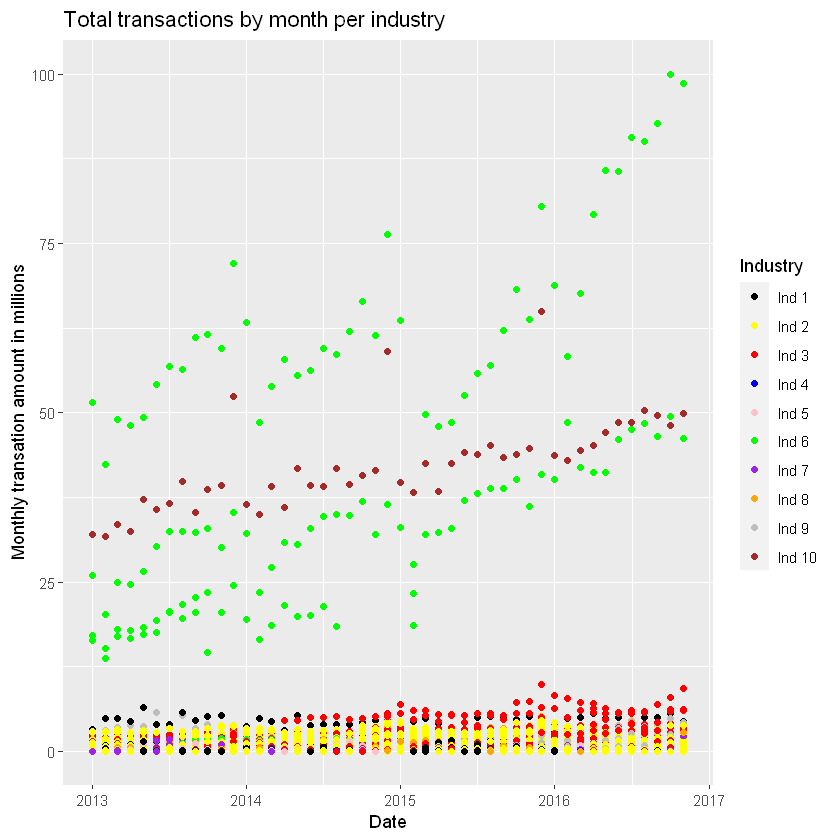

In [6]:
plot_date_vs_month_2 = ggplot(data = dataset, aes(x = date, y = monthly_amount/1e6)) +
  geom_point(aes(colour = cut(industry, c(0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11)))) +
  scale_color_manual(name = "Industry",
                     values = c("(0,1]" = "black",
                                  "(1,2]" = "yellow",
                                  "(2,3]" = "red",
                                  "(3,4]" = "blue",
                                  "(4,5]" = "pink",
                                  "(5,6]" = "green",
                                  "(6,7]" = "purple",
                                  "(7,8]" = "orange",
                                  "(8,9]" = "grey",
                                  "(9,10]" = "brown"),                              

                     labels = c("Ind 1", "Ind 2", "Ind 3", "Ind 4", "Ind 5", "Ind 6", "Ind 7", "Ind 8", "Ind 9", "Ind 10"))+
  scale_y_continuous(labels = scales::comma) +
  labs (title = "Total transactions by month per industry",
        x = "Date",
        y = "Monthly transation amount in millions")
        
plot_date_vs_month_2

C. Relationship between total transactions per month and location.

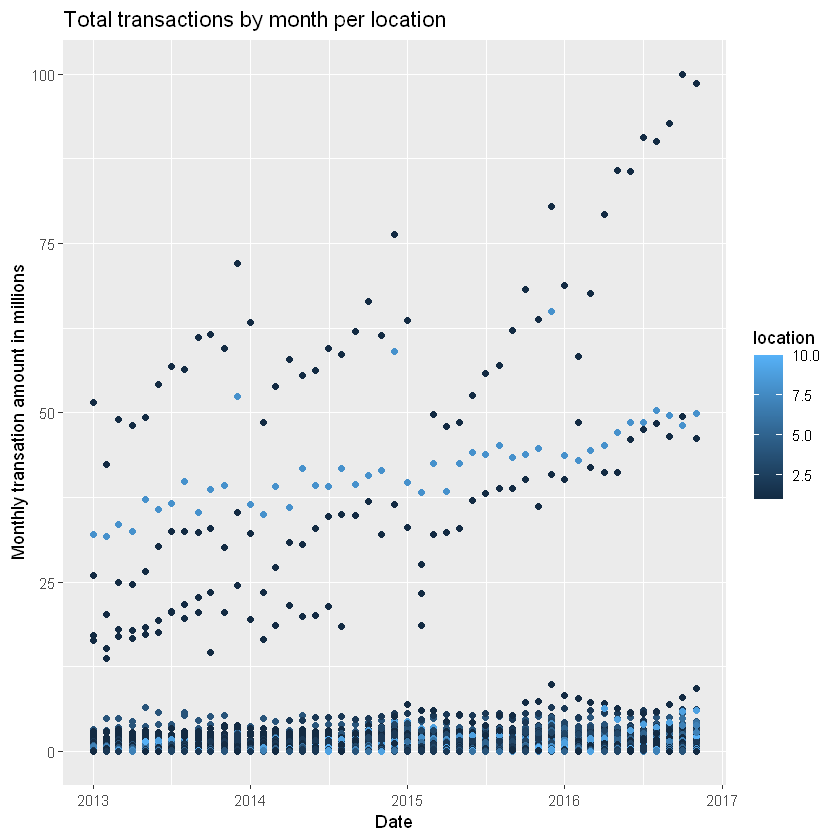

In [7]:
plot_date_vs_month_location = ggplot(data = dataset, aes(x = date, y = monthly_amount/1e6)) +
  geom_point(aes(colour = location)) +
  scale_y_continuous(labels = scales::comma) +
  labs (title = "Total transactions by month per location",
        x = "Date",
        y = "Monthly transation amount in millions")

plot_date_vs_month_location

D. Numbers of transactions vs average monthly transactions

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


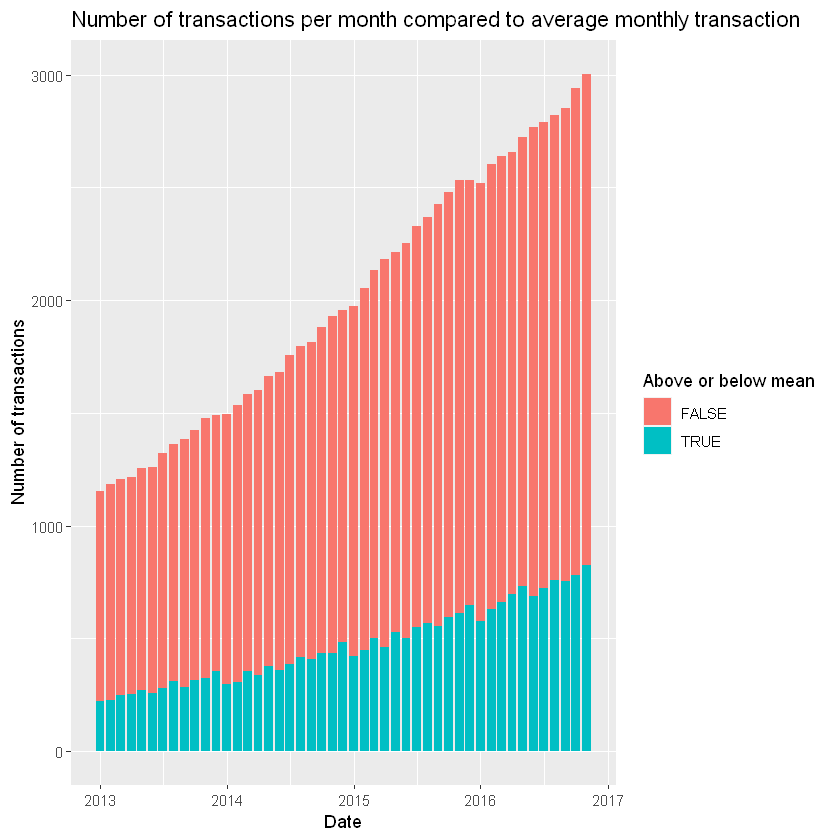

In [8]:
# we first need to create a boolean operator that says if our value is above or below our mean
transactions_with_mean_boolean <- dataset %>%
  mutate(monthly_amount_above_mean = ifelse(monthly_amount > mean(monthly_amount), TRUE, FALSE))

# plotting the data of true false monthly average compared to the mean
quickplot(x = date, fill = monthly_amount_above_mean, data = transactions_with_mean_boolean, geom = "bar",
      main = "Number of transactions per month compared to average monthly transaction")+
     scale_fill_discrete(name = "Above or below mean")+
    ylab("Number of transactions")+
    xlab("Date")

From the above graph we can see that most of the monthly transactions are below the mean monthly transactional value with increase in number of transaction except for December and January which is due to seasonality and holidays which is explained below.

E. Location performance vs Average monthly transaction amount

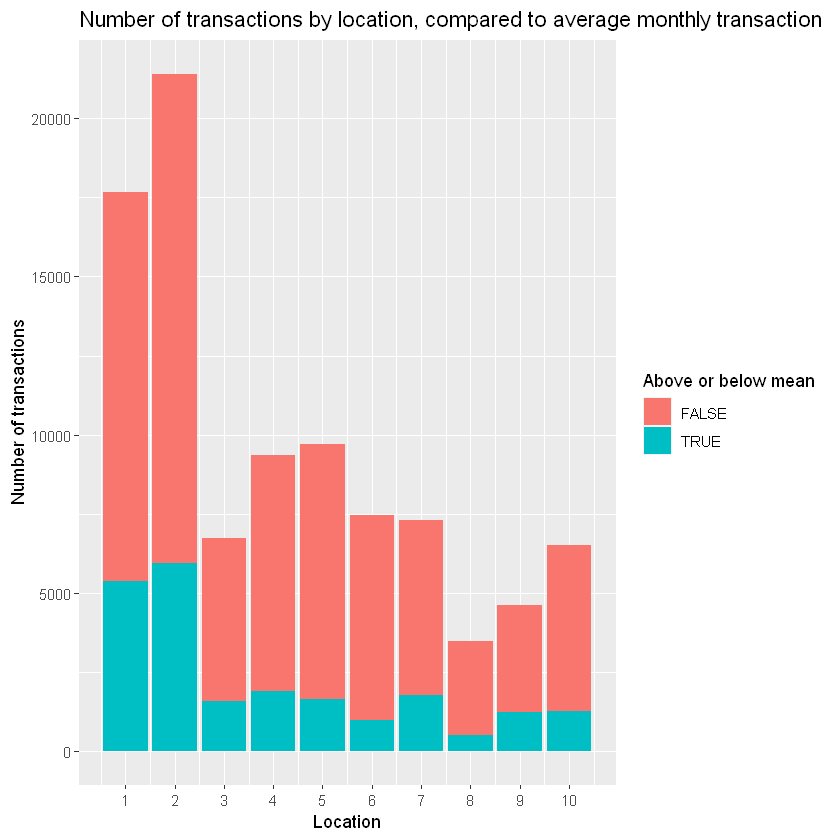

In [9]:
quickplot(x = location, fill = monthly_amount_above_mean, data = transactions_with_mean_boolean, geom = "bar",
      main = "Number of transactions by location, compared to average monthly transaction")+ #, scale_x = breaks = c(1:10))
      scale_fill_discrete(name = "Above or below mean")+
      scale_x_continuous(breaks=1:10) +
     ylab("Number of transactions")+
     xlab("Location")

From the above graph we can see that location 1 and 2 performance is better than others however the proportion of above to below monthly transactions appear to be similar across all locations.

F. Monthly average compared by industry

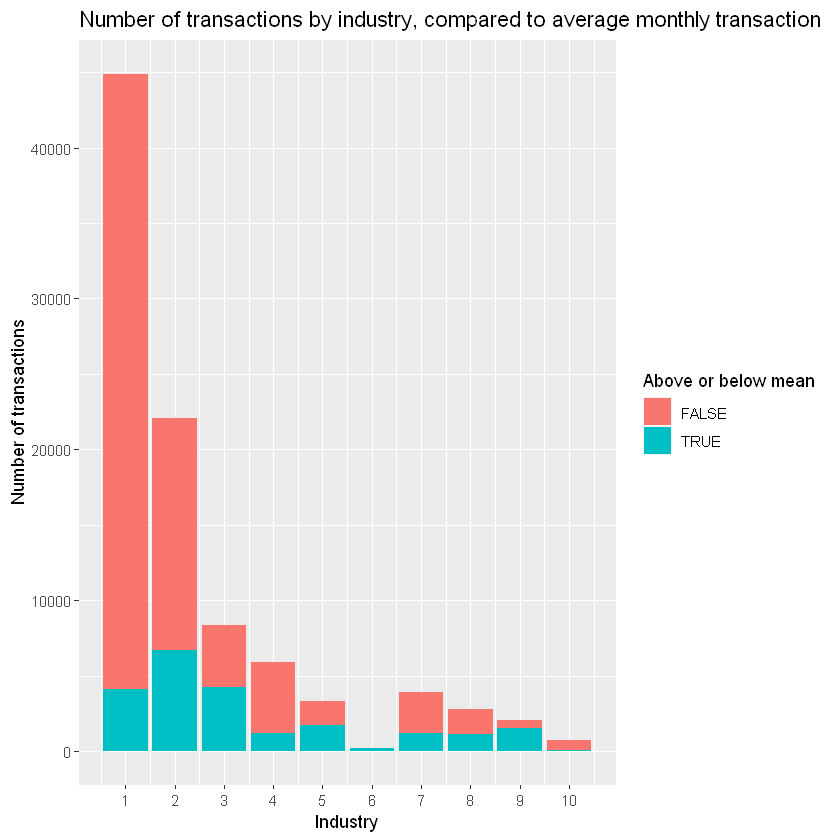

In [10]:
quickplot(x = industry, fill = monthly_amount_above_mean, data = transactions_with_mean_boolean, geom = "bar",
      main = "Number of transactions by industry, compared to average monthly transaction")+
      scale_fill_discrete(name = "Above or below mean")+
      scale_x_continuous(breaks=1:10) +
      ylab("Number of transactions")+
     xlab("Industry")

Industry 1 and 2 generate most number of transactions but below the average monthly transaction amount.Similarly, 9 and 10 generating lowest which are above the average

G. Data Skewness/Imbalance   

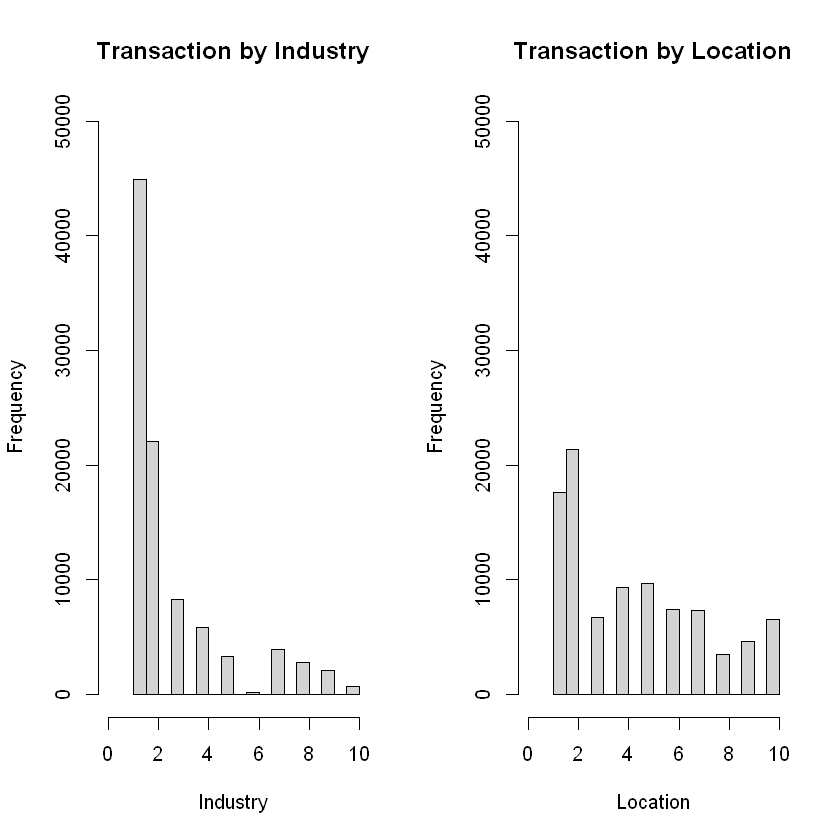

In [11]:
# combine 2 plots into 1 plot
par(mfrow=c(1,2))
# plot data distribution 
# 1. MONTHLY_AMOUNT group by INDUSTRY
hist(dataset$industry,
     main = "Transaction by Industry", 
     xlab="Industry", 
     xlim = c(0,10), 
     ylim=c(0,50000), 
     las=0)
## 2. MONTHLY_AMOUNT group by LOCATION
hist(dataset$location,
     main = "Transaction by Location", 
     xlab="Location", 
     xlim = c(0,10), 
     ylim=c(0,50000), 
     las=0)

The plot shows that location 1 and 2 contributed the most to the industry column, whereas industries 2 and 1 had the highest frequency distribution for the location. These findings suggest that the model can estimate the total transaction value for the following month more accurately when location 1, 2, and/or industry 1, 2, are included.

**2.2 Exploratory Data Analysis (Business Insights)**


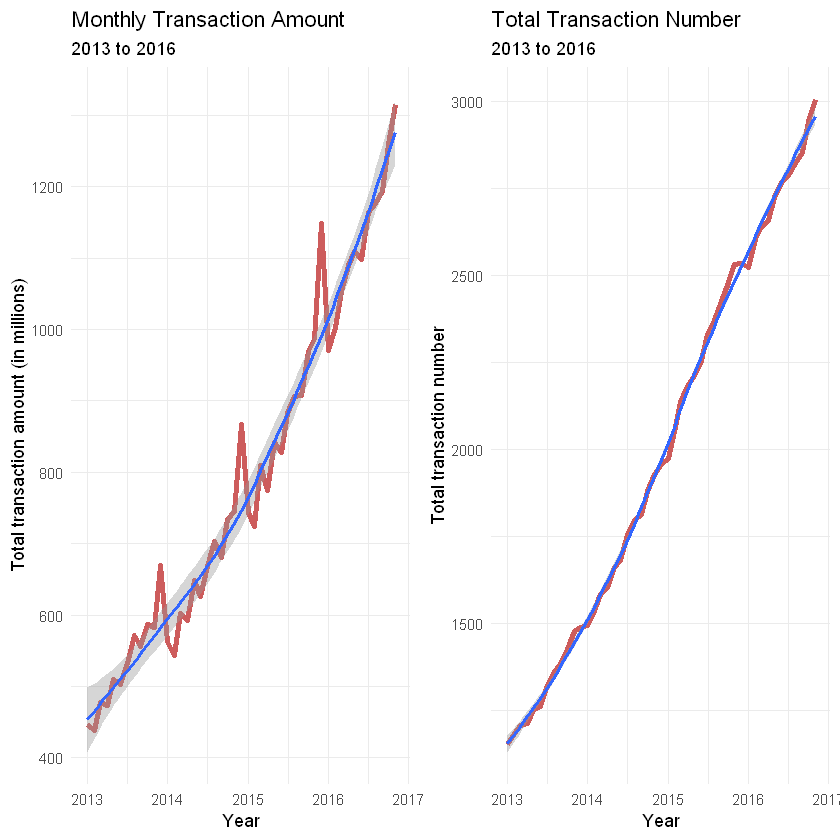

In [12]:
##----------------------------------------------------------------
##  Data Visualization                                          --
##----------------------------------------------------------------

##:::::::::::::::::::::::::::::::::::::::::
##  1. Transaction Amount & # Transaction  
##:::::::::::::::::::::::::::::::::::::::::

# create new df contain total transaction amount
transaction_amount <- sqldf(
  "SELECT
  date,
  'Transaction Amount' as type,             -- specify value type
  SUM(monthly_amount) AS value              -- sum total transaction amount
FROM dataset
GROUP BY date                                -- filter by date
ORDER BY date
"
)

# create new df contain number of transaction
transaction_count <- sqldf(
  "SELECT
  date,
    'Transaction Count' as type,             -- specify value type
  COUNT(*) as value                         -- count total number of transactions
FROM dataset
GROUP BY date                                -- filter by date
ORDER BY date
"
)

# merge 2 df into 1 new TRANSACTION df vertically 
transaction_df <- rbind(transaction_amount, 
                        transaction_count)

# plot transaction amount over time
monthly_amount_plot <- transaction_df %>%
  # filter by transaction amount only
  filter(type=="Transaction Amount") %>%   
  # assign x and y-axis from the dataset
  ggplot(aes(x = date, y = value/1e6)) +     
  # add the line graph, color, and the size
  geom_line(color = "indianred", linewidth=1.6) + 
  # the relationship graph between x and y
  geom_smooth(formula = y~x,                    
              method = 'loess') +
  labs(x = "Year", 
       y = "Total transaction amount (in millions)",
       title = "Monthly Transaction Amount",
       subtitle = "2013 to 2016") +
  theme_minimal()


# plot total transaction number over time
monthly_count_plot <- transaction_df %>%
  # filter by total transaction number count only
  filter(type=="Transaction Count") %>% 
  # assign x and y-axis from the dataset
  ggplot(aes(x = date, y = value)) +    
  # add the line graph, color, and the size
  geom_line(color = "indianred", linewidth=1.6) +   
  # the relationship graph between x and y
  geom_smooth(formula = y~x,                   
              method = 'loess') +
  labs(x = "Year", 
       y = "Total transaction number",
       title = "Total Transaction Number",
       subtitle = "2013 to 2016") +
  theme_minimal()

## combine individual plots into a single page  
ggarrange(monthly_amount_plot,
          monthly_count_plot,
          ncol = 2, nrow = 1)

In case of total transactional amount we can see that seasonality is captured with sharp increases throughout the years from 2013 to 2017 while smoothly for number of transactions.

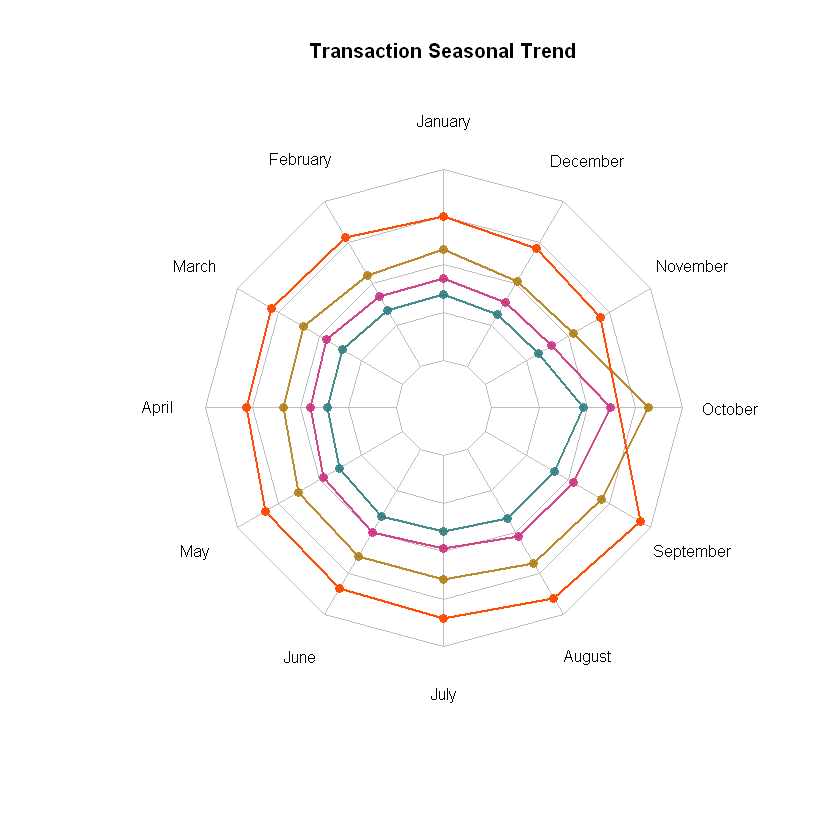

In [13]:
##----------------------------------------------------------------
##  Data Visualization                                          --
##----------------------------------------------------------------

##::::::::::::::::::::::::::::::::::::::
##  2. Time-series and Seasonal Trend 
##::::::::::::::::::::::::::::::::::::::

## Create new MONTHLY_TREND df to plot seasonal transaction trend
new_ts_df <- sqldf(
  "SELECT
   strftime('%m', date) as month,   --extract month from date column                   
   strftime('%Y',                   --extract year from date column
   date * 3600 * 24,
   'unixepoch') as year,
  SUM(monthly_amount) AS transaction_amount
FROM dataset
GROUP BY
  month,
  year
ORDER BY
  month,
  year
"
)

## transpose the dataset to prepare for the data visualization
monthly_trend <- recast(new_ts_df, 
                        year + variable ~ month, 
                        id.var = c("month", "year"))
monthly_trend <- data.frame(monthly_trend[,-1],            # use the first column as the data index
                            row.names = monthly_trend[,1]) # use the first row as the header
monthly_trend <- subset(monthly_trend, select = -variable) # remove the unecessary column


## create new vector specify month column names
colnames(monthly_trend) <- c('January', 'February', 'March', 'April', 
                             'May', 'June', 'July', 'August', 'September', 
                             'October', 'November', 'December')


## To use the fmsb package, I have to add 2 lines to the dataframe: 
## the max and min of each variable to show on the plot!
data <- rbind(rep(1400e6,12) , rep(0,12) , monthly_trend)


## create color vector
colr_1 <- rgb(0.2,0.5,0.5,0.9)
colr_2 <- rgb(0.8,0.2,0.5,0.9)
colr_3 <- rgb(0.7,0.5,0.1,0.9)
colr_4 <- "#FC4E07"


## set color theme for radar border
colors_border=c(colr_1, 
                colr_2, 
                colr_3, 
                colr_4)


## plot with default options:
seasonal_mul_plot <- radarchart(data, axistype=0,
                                #custom polygon
                                pcol=colors_border, plwd=2 , plty=1,
                                #custom the grid
                                cglcol="grey", cglty=1, axislabcol="grey", cglwd=0.8,
                                #custom labels
                                vlcex=0.8, title=paste("Transaction Seasonal Trend"), cex.main = 1
  )

## Add a legend
legend(seasonal_mul_plot, 
       x=1.5, y=0.5, 
       legend = 
         rownames(data[-c(1,2),]), 
       bty = "n", pch=15 ,
       col=colors_border, 
       text.col = "black", 
       cex=1.2, 
       pt.cex=1, 
       title = "Year")


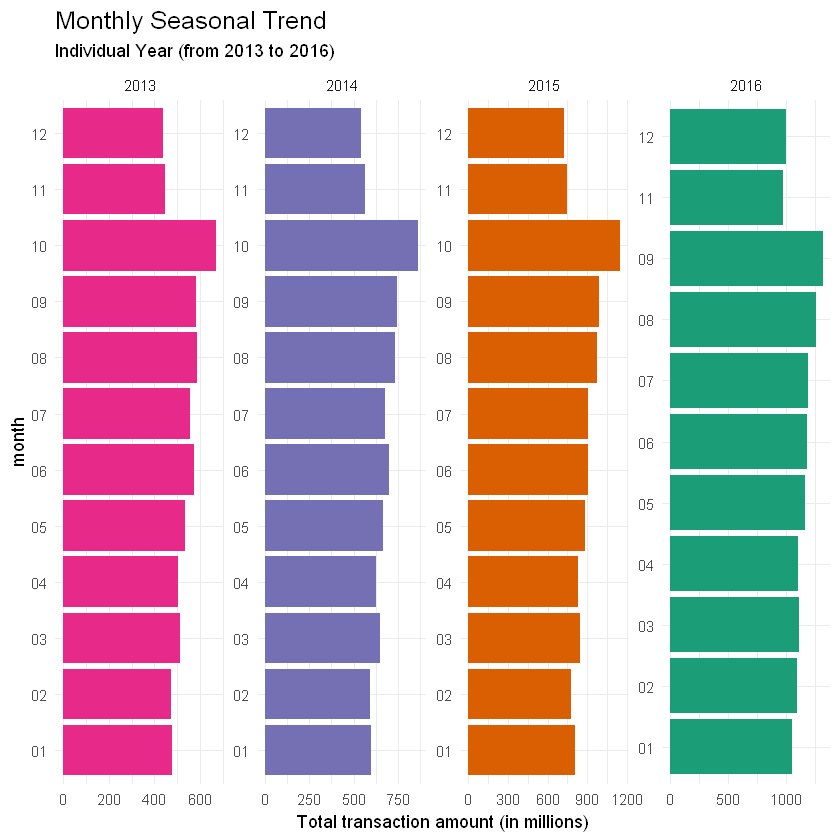

In [14]:
# Individual Years Bar Charts
ggplot(new_ts_df) +
  aes(x = month, fill = year, weight = transaction_amount/1e6) +
  geom_bar() +
  scale_fill_brewer(palette = "Dark2", 
                    direction = -1) +
  labs(y = "Total transaction amount (in millions)", 
       title = "Monthly Seasonal Trend", 
       subtitle = "Individual Year (from 2013 to 2016)") +
  coord_flip() +
  theme_minimal() +
  theme(legend.position = "none", 
        plot.title = element_text(size = 15L)) +
  facet_wrap(vars(year), scales = "free", nrow = 1L)

From the pattern, We can see the people trade more from Jan to October while low in November and December during Christmas and New Year. There may be variety of factors to support our hypothesis which may or may not true for locations and industries. 

**3. Data Preparation**  
Data preparation or feature Engineering, meaning the creation of new features from the ones already existing. We created average amount by date, industry and location so that we can fit it into our linear regression model.

In [15]:
a1 <- dataset %>%
  group_by(date, industry, location) %>%
  summarize(avg = mean(monthly_amount))

a1

`summarise()` has grouped output by 'date', 'industry'. You can override using
the `.groups` argument.


date,industry,location,avg
<date>,<int>,<int>,<dbl>
2013-01-01,1,1,136080.9
2013-01-01,1,2,177840.1
2013-01-01,1,3,141632.5
2013-01-01,1,4,221057.7
2013-01-01,1,5,178138.1
2013-01-01,1,6,133400.1
2013-01-01,1,7,231599.5
2013-01-01,1,8,143778.2
2013-01-01,1,9,157415.5


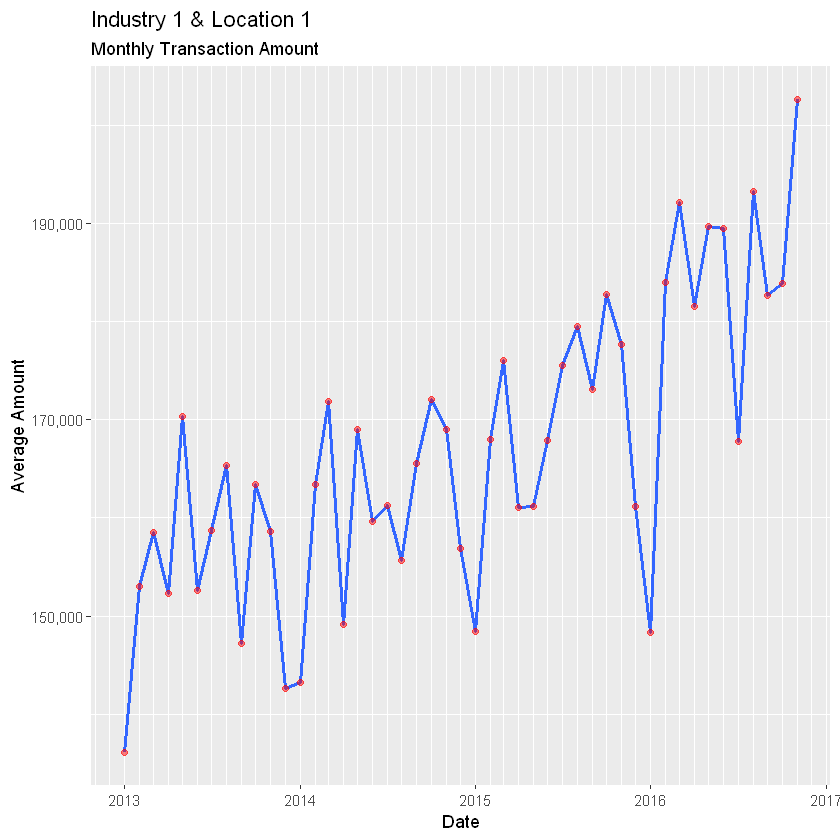

In [16]:
#filtered for industry 1 and location 1
il1 <- 
  a1 %>%
  filter(location == 1, industry == 1)
  
p7 <- ggplot(data=il1, aes(x=date, y=avg)) +
  geom_smooth(stat="identity") +
  geom_point(colour = "red", alpha = 0.5) +
  scale_y_continuous(labels = scales::comma) +
  scale_x_date(date_minor_breaks = "1 month") +
  labs (title = "Industry 1 & Location 1",
        subtitle = "Monthly Transaction Amount",
        x = "Date", y = "Average Amount")

p7

In [17]:
#function to create the average monthly amount per transaction. Note that we have not included the ID number as of yet.
mean.fun <- function(df) {
  output = df %>%
    group_by(date, industry, location) %>%
    summarize(avg = mean(avg))
  
  output = output %>%
    mutate(month = format(as.Date(date), "%m")) %>%
    mutate(year = format(as.Date(date), "%Y"))
  
  output$month = as.integer(output$month)
  output$year = as.integer(output$year)
  
  transform(output, month = as.integer(month), 
                    year = as.integer(year))
  
  return(output)

}

il1 <- mean.fun(il1)

il1$id <- 1:nrow(il1)
il1 <- as.data.frame(il1)

`summarise()` has grouped output by 'date', 'industry'. You can override using
the `.groups` argument.


**4. Modeling**  
For industry = 1 and location = 1, train a linear regression model with monthly_amount as the target.

**Train/Test Split**  
The easiest way to capture all 47 observations for this particular function would be to include each year plus a few more months to account for seasonality. Divide this up into 60/20/20 Train/Test/Validate groups. With 29 observations in the train set, 9 in the test set, and 9 in the validate set, we now have a total of 29 observations.

In [18]:
# lets create a train/test model for this exercise. 

il1.train <- slice(il1, 1:38)
il1.test <- slice(il1, 39:47)


In [19]:
#lets create a linear model to see what we can get with this train set.

il1.lm = lm(formula = avg ~ date + id + month, 
            data = il1.train)

summary(il1.lm)


Call:
lm(formula = avg ~ date + id + month, data = il1.train)

Residuals:
   Min     1Q Median     3Q    Max 
-19393  -8260   2334   6935  17362 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) 56745633.6 34054908.8   1.666    0.105
date           -3610.7     2172.6  -1.662    0.106
id            110414.2    66105.2   1.670    0.104
month            378.9      445.9   0.850    0.401

Residual standard error: 9533 on 34 degrees of freedom
Multiple R-squared:  0.3773,	Adjusted R-squared:  0.3223 
F-statistic: 6.867 on 3 and 34 DF,  p-value: 0.0009706


`geom_smooth()` using formula = 'y ~ x'


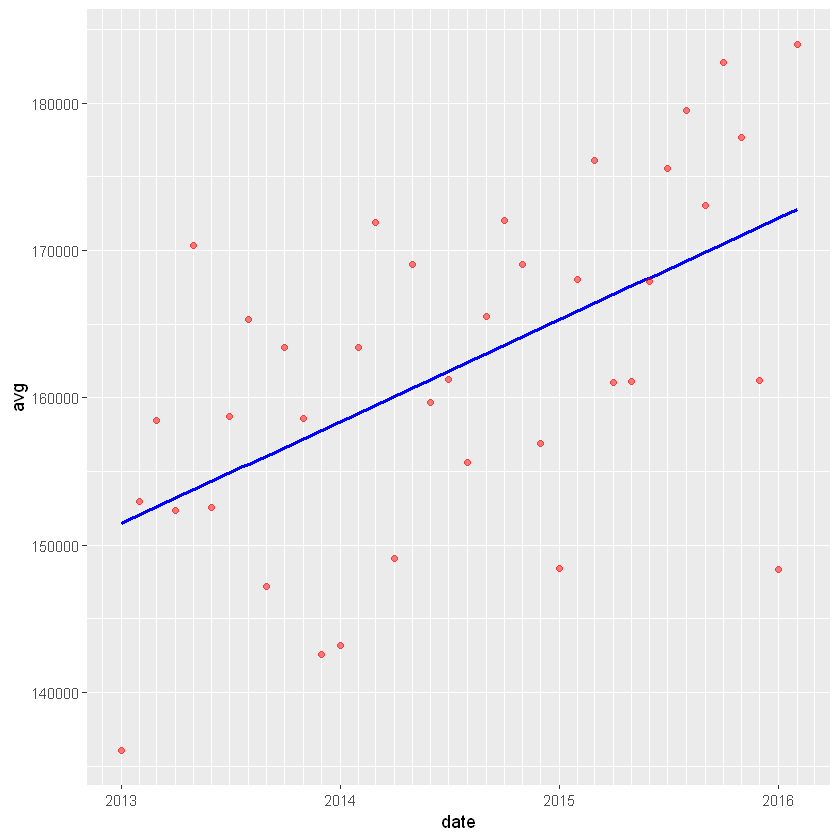

In [20]:
#lets plot it.

p8 <- ggplot(data=il1.train, aes(x=date, y=avg)) +
  geom_smooth(method = "lm", se = FALSE, colour = "blue") +
  geom_point(colour = "red", alpha = 0.5) +
  scale_x_date(date_minor_breaks = "1 month")

p8  

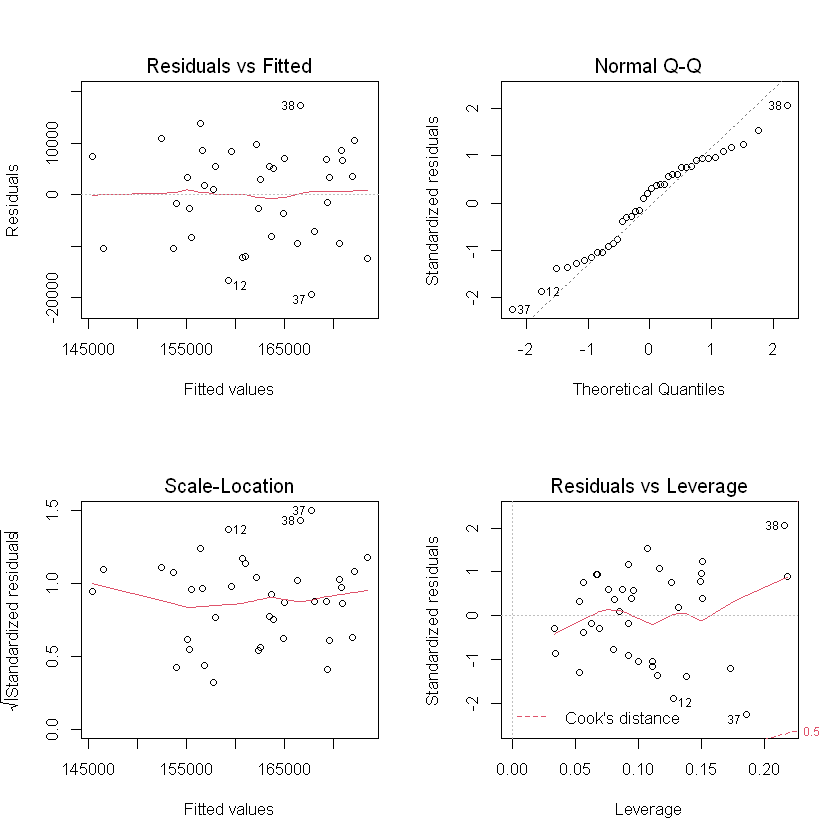

In [21]:
par(mfrow=c(2,2))
plot(il1.lm)

In [22]:
prediction <- predict(il1.lm, il1.test)
print(((prediction - il1.test$avg)/il1.test$avg)*100)

         1          2          3          4          5          6          7 
-10.127527  -5.500026  -8.258356  -8.739239   4.526101  -9.847730  -5.230346 
         8          9 
 -4.504547 -13.920244 


We can see that the result above varies -14% to +5% of the actual figures in our test set.

In [23]:
#method 1, create new data frame with the value id = 48 for the prediction model to predict the outcome at this sequence. 

december2016<-data.frame(date = "01/12/16",
                                   industry=1,
                                   location=1,
                                   avg=0,
                                  month=12,
                                  year=2016,
                                   id=48)

december2016$date <- as.Date(december2016$date,
                            format = "%d/%m/%y")
december2016$industry <- as.integer(december2016$industry)
december2016$location <- as.integer(december2016$location)
december2016$id <- as.integer(december2016$id)

#apply the linear model and predict december 2016

december2016$avg <- predict(il1.lm,december2016)

december2016

date,industry,location,avg,month,year,id
<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
2016-12-01,1,1,176893.6,12,2016,48


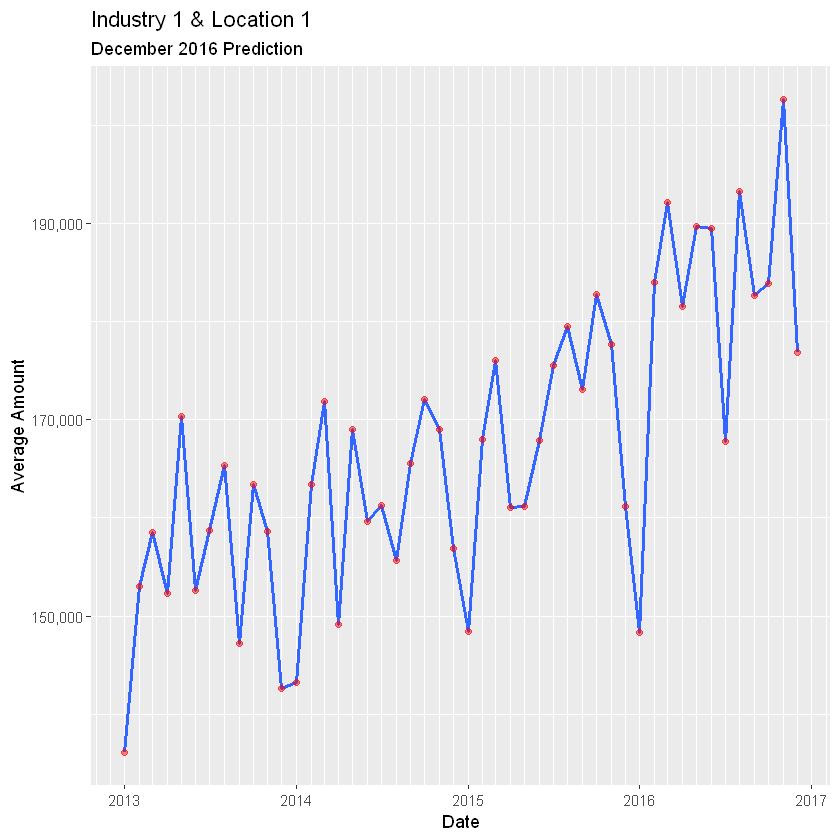

In [24]:
predicted_outcome <- rbind(il1, december2016)

p9 <- ggplot(data=predicted_outcome, aes(x=date, y=avg)) +
  geom_smooth(stat="identity", method = "lm") +
  geom_point(colour = "red", alpha = 0.5) +
  scale_y_continuous(labels = scales::comma) +
  scale_x_date(date_minor_breaks = "1 month") +
  labs (title = "Industry 1 & Location 1",
        subtitle = "December 2016 Prediction",
        x = "Date", y = "Average Amount")

p9

**5. Evaluation**  
To evaluate our model, we used R2 as the score metrics which was around 37%. It works by measuring the amount of variance in the predictions/target variable which is monthly amount in our case. Simply, it is the difference between the samples in the dataset and the predictions made by the model between 0 and 1. The figure makes it evident that the projection for December 2016 is lower than the value that was given for November. This supports our earlier claims regarding the data’s seasonality, which is evidenced by declines in December and January.

**6. Deployment**

For the deployment part which is crucial part of machine learning since everyone may not be tech guy, the project report will be made available for documentation purposes about the technical and non-technical aspects for further use along with adding an overview summarizing the entire project and its results. Since we can present the output of my model to business stakeholders, we can deploy the project using R shiny which is used to make interactive web app for R language. The output can be presented with dashboards along with some user inputs like industry, locations, and month so that we can visualize the predictions of next months or for viewing earlier year trends to make it more dynamic. The last step is to review and maintain project. The data mining team needs to discuss what worked and what didn’t, what would be good to do again, and what should be avoided to make experience documentation report so that any improvements can be made in the process in future.